Note: You need to install plotly, kaleido to run this file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [3]:
waypoints = [6, 13, 15]

# store runtime data for MCTS and DFS in a 2d list
mcts_runtimes, dfs_runtimes = [], []

# store mission time data for MCTS and DFS in a 2d list
mcts_mission_times, dfs_mission_times = [], []

In [4]:
# Load data from CSV files and organize it by waypoint
for waypoint in waypoints:
    mcts_df = pd.read_csv(f'MCTS_{waypoint}p_10000.csv')
    mcts_runtime, mcts_mission_time = mcts_df['duration_mcts_v2'], mcts_df['total_time']
    mcts_runtimes.append(mcts_runtime)
    mcts_mission_times.append(mcts_mission_time)

    dfs_df = pd.read_csv(f'DSP_{waypoint}p.csv')
    dfs_runtime, dfs_mission_time = dfs_df['DFS_runtime'], dfs_df['mission_time']
    dfs_runtimes.append(dfs_runtime)
    dfs_mission_times.append(dfs_mission_time)

In [5]:
# calculate mean runtimes for MCTS and DFS
mcts_means = [data.mean() for data in mcts_runtimes]
dfs_means = [data.mean() for data in dfs_runtimes]

# calculate mean mission times for MCTS and DFS
mcts_mission_means = [data.mean() for data in mcts_mission_times]
dfs_mission_means = [data.mean() for data in dfs_mission_times]

In [6]:
bar_colors = ['#47A5EA', '#16CE4D'] # DFS, MCTS

bar_width = 0.35
index = np.arange(len(waypoints))

### DFS vs MCTS Runtime Plot

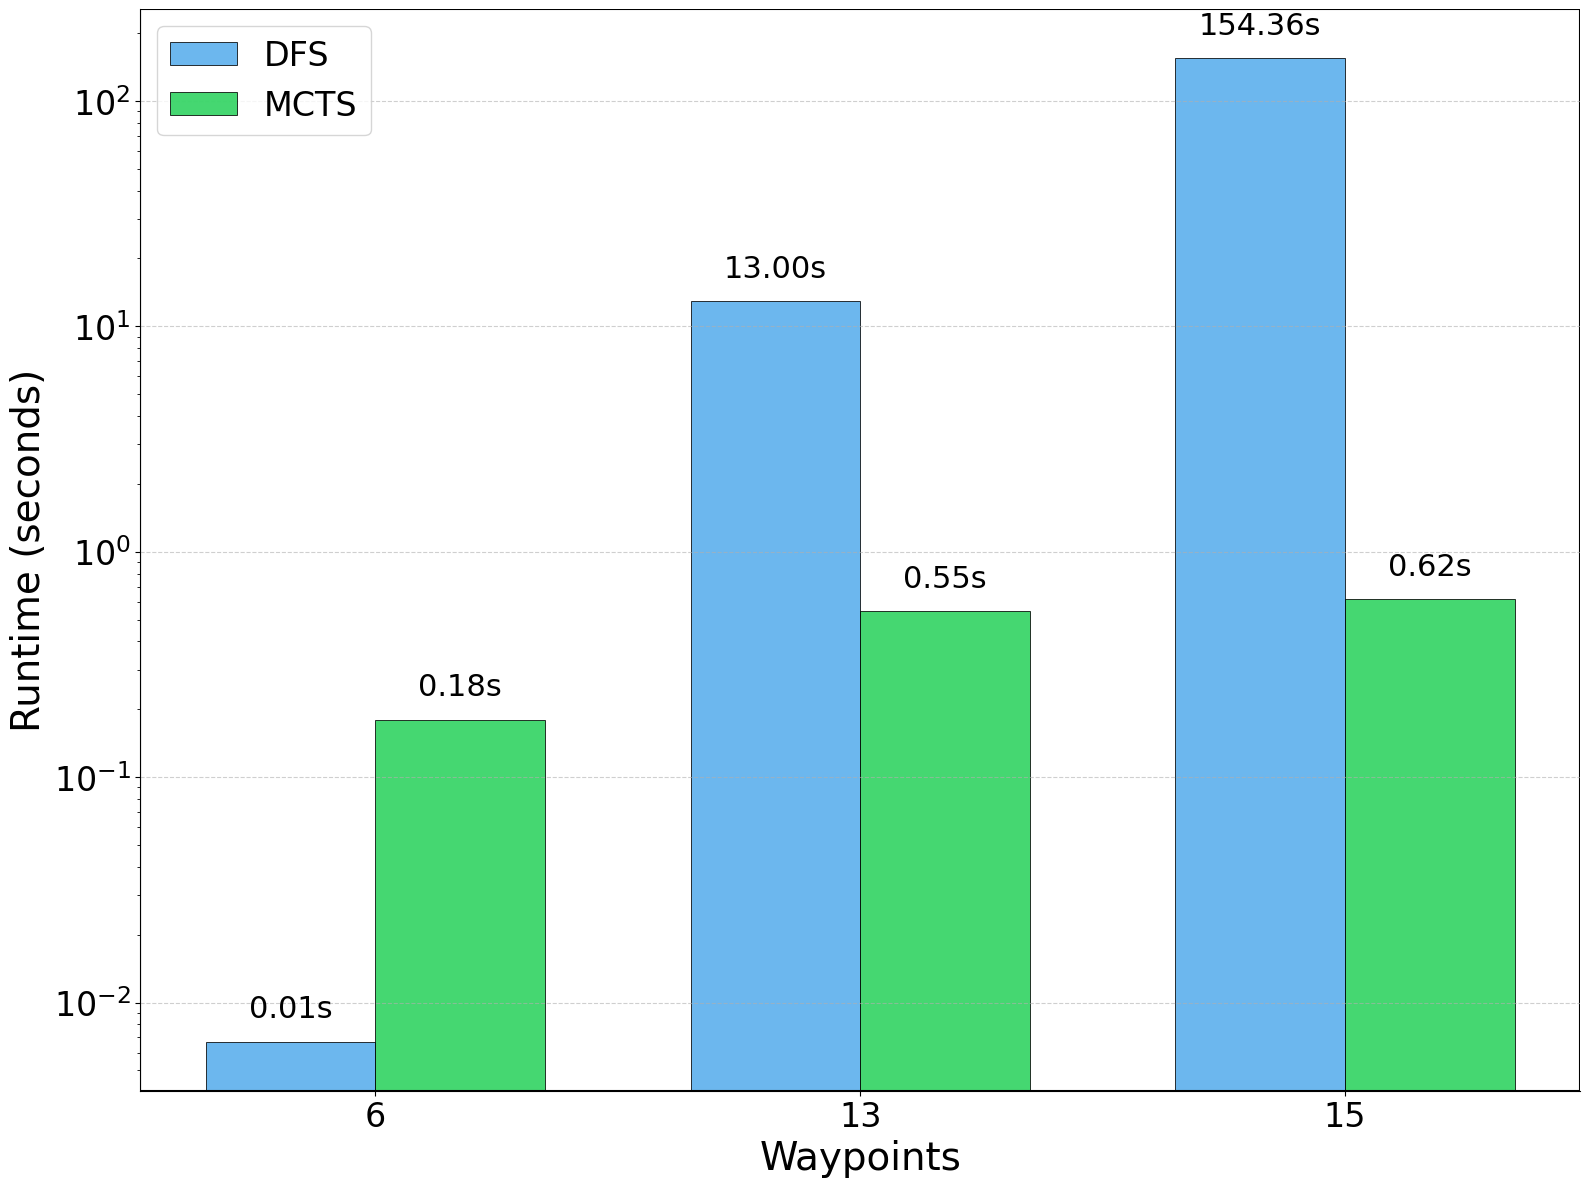

In [7]:
fig, ax = plt.subplots(figsize=(16, 12))

plt.bar(index - bar_width/2, dfs_means, bar_width, label='DFS', color=bar_colors[0], edgecolor='black', linewidth=0.7, alpha=0.8)
plt.bar(index + bar_width/2, mcts_means, bar_width, label='MCTS', color=bar_colors[1], edgecolor='black', linewidth=0.7, alpha=0.8)

# Logarithmic scale for y-axis
plt.yscale('log')

# show avg runtime on top of bars
font_size_annotation = 22  # Adjust as needed
for i, mean_value in enumerate(dfs_means):
    plt.text(index[i] - bar_width/2, mean_value * 1.2, f'{mean_value:.2f}s', ha='center', va='bottom', fontsize=font_size_annotation, color='black')
for i, mean_value in enumerate(mcts_means):
    plt.text(index[i] + bar_width/2, mean_value * 1.2, f'{mean_value:.2f}s', ha='center', va='bottom', fontsize=font_size_annotation, color='black')

# Adjust font sizes
label_font_size = 28
tick_font_size = 24
legend_font_size = 24

plt.xlabel('Waypoints', fontsize=label_font_size)
plt.ylabel('Runtime (seconds)', fontsize=label_font_size)
plt.xticks(index, waypoints, fontsize=tick_font_size)
plt.yticks(fontsize=tick_font_size)
plt.legend(loc='upper left', fontsize=legend_font_size)

# add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

rectangle = Rectangle((ax.get_xlim()[0], ax.get_ylim()[0]), 
                      ax.get_xlim()[1] - ax.get_xlim()[0], 
                      ax.get_ylim()[1] - ax.get_ylim()[0], 
                      fill=False, 
                      edgecolor='black', 
                      linewidth=1.5)
ax.add_patch(rectangle)

plt.savefig('runtime_barplot.png', dpi=300, bbox_inches='tight') # change to PDF for vector graphics
plt.tight_layout()
plt.show()


### DFS vs MCTS Mission Time Plot

In [14]:
# Create subplots with one row and one column per waypoint

fig = make_subplots(rows=1, cols=len(waypoints), subplot_titles=[f'Waypoint {wp}' for wp in waypoints], shared_xaxes=True)

boxplot_arguments = {"boxmean": True, "boxpoints": False, "width": 0.35, "whiskerwidth": 1}

# Add box plots for Mission Times for each waypoint with adjusted boxpoints
for i, waypoint in enumerate(waypoints):
    fig.add_trace(go.Box(y=dfs_mission_times[i], name=f'DFS', marker_color=f"{bar_colors[0]}", **boxplot_arguments), row=1, col=i+1)
    fig.add_trace(go.Box(y=mcts_mission_times[i], name=f'MCTS', marker_color=bar_colors[1], **boxplot_arguments), row=1, col=i+1)

# Set the layout title
fig.update_layout(
    yaxis_title='Mission Time (hours)',
    # boxmode='group',  # Group box plots for each waypoint
    showlegend=False,  # Hide legend as it's per subplot
    width=1200,
    height=600
)

fig.write_image("missionTime_boxplot.png", scale=3) # increase scale for higher DPI
fig.show()

In [9]:
""" # Plot DFS mission times as box plots
plt.boxplot(dfs_mission_times, positions=index - bar_width/2, widths=bar_width, vert=True, patch_artist=True, labels=waypoints)
# Plot MCTS mission times as box plots
plt.boxplot(mcts_mission_times, positions=index + bar_width/2, widths=bar_width, vert=True, patch_artist=True, labels=waypoints)

# Customize the appearance of the plot
box_colors = ['lightgreen', 'lightblue']
for patch, color in zip(plt.gca().containers, box_colors):
    for box in patch:
        box.set_facecolor(color)

plt.ylabel('Mission Time (hours)', fontsize=12)
plt.xlabel('Waypoints', fontsize=12)
plt.title('Mission Times for MCTS and DFS by Waypoint', fontsize=14)

# Customize y-axis tick labels to show hours
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show() """

" # Plot DFS mission times as box plots\nplt.boxplot(dfs_mission_times, positions=index - bar_width/2, widths=bar_width, vert=True, patch_artist=True, labels=waypoints)\n# Plot MCTS mission times as box plots\nplt.boxplot(mcts_mission_times, positions=index + bar_width/2, widths=bar_width, vert=True, patch_artist=True, labels=waypoints)\n\n# Customize the appearance of the plot\nbox_colors = ['lightgreen', 'lightblue']\nfor patch, color in zip(plt.gca().containers, box_colors):\n    for box in patch:\n        box.set_facecolor(color)\n\nplt.ylabel('Mission Time (hours)', fontsize=12)\nplt.xlabel('Waypoints', fontsize=12)\nplt.title('Mission Times for MCTS and DFS by Waypoint', fontsize=14)\n\n# Customize y-axis tick labels to show hours\nplt.yticks(fontsize=10)\nplt.xticks(fontsize=10)\n\n# Add grid lines\nplt.grid(axis='y', linestyle='--', alpha=0.6)\n\n# Remove top and right spines\nax.spines['top'].set_visible(False)\nax.spines['right'].set_visible(False)\n\nplt.tight_layout()\nplt.